# scaredyrat-FC analyzes data from fear conditioning protocol

In [1]:
# notebook formatting and loading settings, imports - keep same

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import math
import time
import os, sys

sys.path.append('../src')
import scaredyrattools as sr

# Change variables in this cell:

In [33]:
## Be sure to put r before the path
## Easiest to go to correct folder, then copy/paste its path

# note to self - just change week number every time? i think?
# need to modify for easy use on non-unix
inpath = '/Users/liannj/Documents/Anna/eCBData/Week5/2FC'

## Make sure the folder exists already.
## The file does not need to exist; it will be created.
outpath = '/Users/liannj/Documents/Anna/eCBData/OutputWeek5'

filename = 'Raw data-eCB Fear Conditioning Spring 2018-Trial    85.xlsx' ## include .xlsx

sheetlist = ['Track-Arena 1-Subject 1', 'Track-Arena 2-Subject 1', 
             'Track-Arena 3-Subject 1', 'Track-Arena 4-Subject 1']

# Function calls below

Raw data-eCB Fear Conditioning Spring 2018-Trial    85.xlsx Track-Arena 1-Subject 1 is EF33 in FC


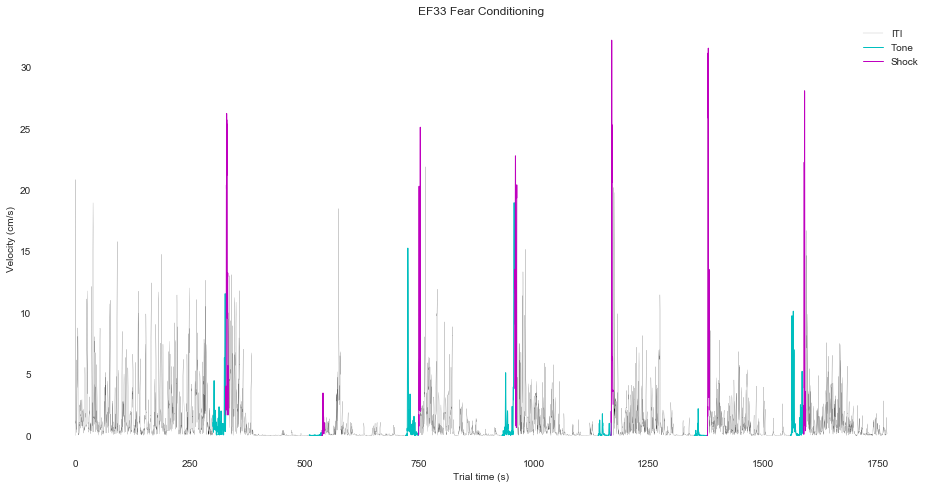

Raw data-eCB Fear Conditioning Spring 2018-Trial    85.xlsx Track-Arena 2-Subject 1 is EF34 in FC


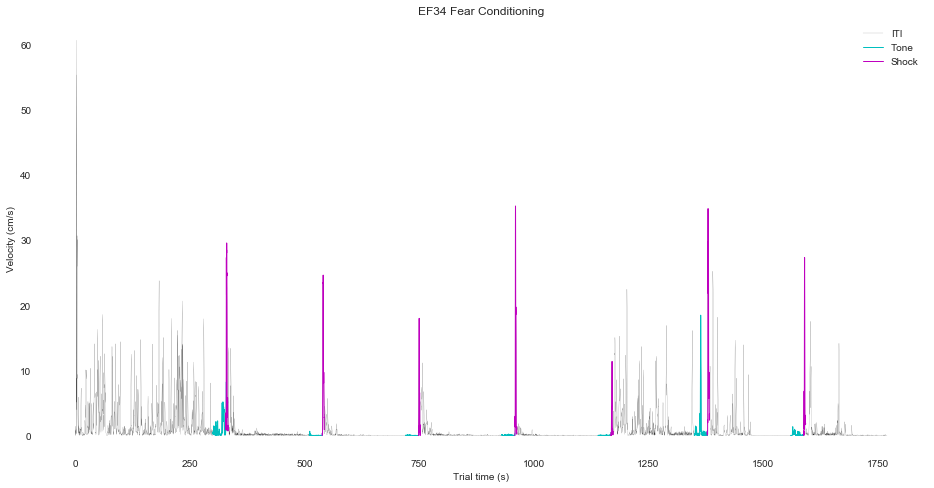

Raw data-eCB Fear Conditioning Spring 2018-Trial    85.xlsx Track-Arena 3-Subject 1 is EF35 in FC


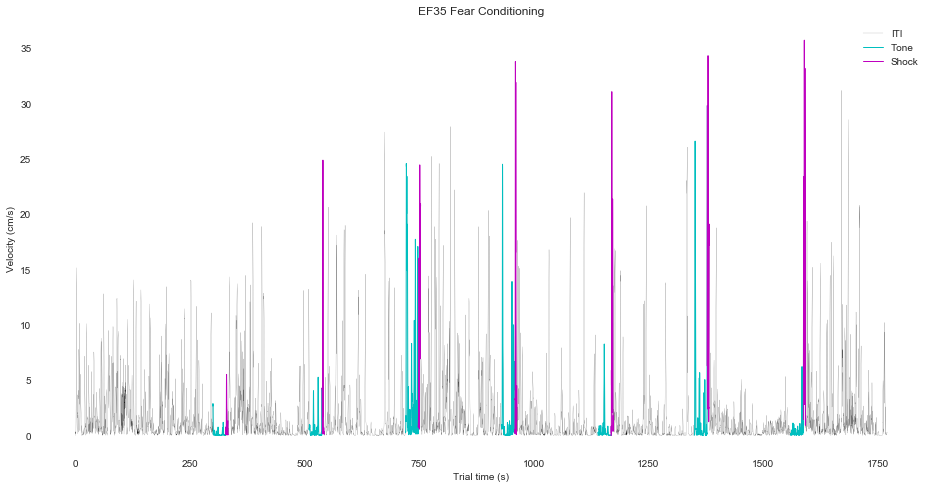

Raw data-eCB Fear Conditioning Spring 2018-Trial    85.xlsx Track-Arena 4-Subject 1 is EF36 in FC


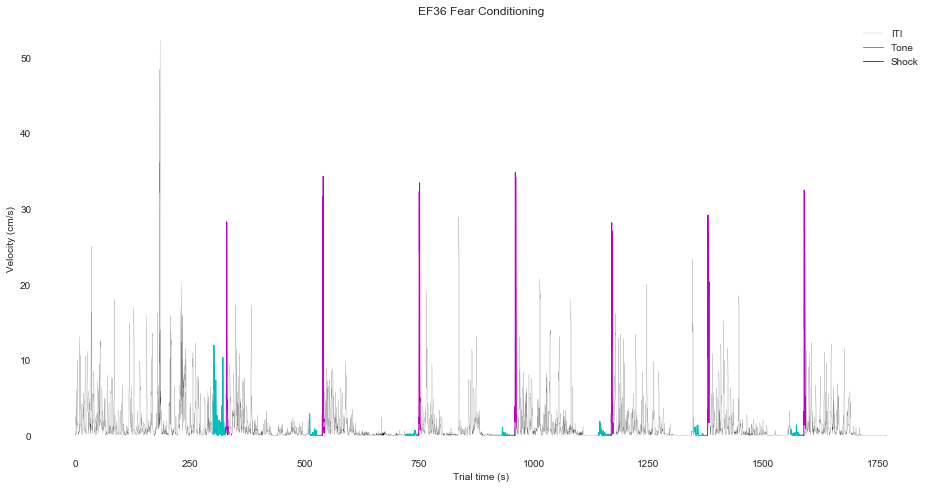

In [34]:
for sheet in sheetlist:
    
    ## set number of tones and input/output info
    ntones = 7
    ID,ctx,grp,anim = sr.animal_read(inpath,filename,sheet,group=True,context=True)
    
    ## use scaredyrattools function to find where each epoch is
    tones = sr.find_tones(anim, ntones)
    pretones = sr.find_pretones(anim, ntones)
    shocks = sr.find_shock_responses(anim, ntones)
    pshocks = sr.find_postshocks(anim, ntones)
    
    ## use scaredyrattools function to find top n velocities
    mtone = sr.get_top_vels(tones,10,ntones)
    mptone = sr.get_top_vels(pretones,10,ntones)
    mshock = sr.get_top_vels(shocks,5,ntones)
    mpshock = sr.get_top_vels(pshocks,10,ntones)
    
    ## define names of CSV files to save to
    mToneOutfile = outpath + '/FC-tone-max-vels-{}.csv' 
    mToneOutfile = mToneOutfile.format(ID)

    mPToneOutfile = outpath + '/FC-pretone-max-vels-{}.csv' 
    mPToneOutfile = mPToneOutfile.format(ID)

    mShockOutfile = outpath + '/FC-shock-max-vels-{}.csv' 
    mShockOutfile = mShockOutfile.format(ID)

    mPShockOutfile = outpath + '/FC-postshock-max-vels-{}.csv' 
    mPShockOutfile = mPShockOutfile.format(ID)
    
    ## send files to previously defined CSVs
    mtone.to_csv(mToneOutfile)
    mptone.to_csv(mPToneOutfile)
    mshock.to_csv(mShockOutfile)
    mpshock.to_csv(mPShockOutfile)
    
    ## use scaredyrattools function to find means
    tmeans = sr.get_means(tones,'Tone',ntones)
    ptmeans = sr.get_means(pretones,'Pre-tone',ntones)
    smeans = sr.get_means(shocks,'Shock',ntones)
    pshockmeans = sr.get_means(pshocks,'Post-shock',ntones)
    allmeans = pd.concat([tmeans, ptmeans, smeans, pshockmeans],axis=1)
    
    ## use scaredyrattools function to find SEMs
    tSEMs = sr.get_SEMs(tones,'Tone',ntones)
    ptSEMs = sr.get_SEMs(pretones,'Pre-tone',ntones)
    sSEMs = sr.get_SEMs(shocks,'Shock',ntones)
    pshockSEMs = sr.get_SEMs(pshocks,'Post-shock',ntones)
    allSEMs = pd.concat([tSEMs, ptSEMs, sSEMs, pshockSEMs],axis=1)

    ## use scaredyrattools function to find medians
    tmeds = sr.get_meds(tones,'Tone',ntones)
    ptmeds = sr.get_meds(pretones,'Pre-tone',ntones)
    smeds = sr.get_meds(shocks,'Shock',ntones)
    pshockmeds = sr.get_meds(pshocks,'Post-shock',ntones)
    allmeds = pd.concat([tmeds, ptmeds, smeds, pshockmeds],axis=1)
    
    ## define names of CSV files to save to
    meanOutfile = outpath + '/FC-mean-{}.csv' 
    meanOutfile = meanOutfile.format(ID)

    SEMOutfile = outpath + '/FC-SEM-{}.csv' 
    SEMOutfile = SEMOutfile.format(ID)

    medOutfile = outpath + '/FC-med-{}.csv' 
    medOutfile = medOutfile.format(ID)

    allmeans.to_csv(meanOutfile)
    allSEMs.to_csv(SEMOutfile)
    allmeds.to_csv(medOutfile)
    
    ## plot stuff
    vels = pd.DataFrame(anim['Velocity'])

    plt.style.use('seaborn-white')
    plt.figure(figsize=(16,8),facecolor='white',edgecolor='white')
    
    # Plots main velocity in black
    line1, = plt.plot(vels,color='k',linewidth=0.1,label='ITI')

    # Loops through tones, plots each one in cyan
    i = 1
    while i <= ntones:
        tone = sr.find_tone_vels(anim,i)
        line2, = plt.plot(tone,color='c',linewidth=1,label='Tone')
        i += 1

    # Loops through shocks, plots each one in magenta
    i = 1
    while i <= ntones:
        sresponse = sr.find_shock_vels(anim,i)
        line3, = plt.plot(sresponse,color='m',linewidth=1,label='Shock')
        i += 1

    sns.despine(left=True, bottom=True, right=True)
    plt.title(ID + " Fear Conditioning")
    plt.legend(handles=[line1,line2,line3])
    plt.ylabel('Velocity (cm/s)')
    plt.xlabel('Trial time (s)')

    ## define where to save the fig
    fname = outpath + '/Compressed/FC-plot-{}'
    fname = fname.format(ID)

    plt.savefig(fname, dpi=300)

    plt.show()
    plt.close()